In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


In [54]:
df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/nyJZEonbPfgZzA')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [56]:
for col in list(df.columns):
  print('признак', col, df[col].describe())

признак gender count    4000.000000
mean        0.510250
std         0.499957
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64
признак Near_Location count    4000.000000
mean        0.845250
std         0.361711
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Near_Location, dtype: float64
признак Partner count    4000.000000
mean        0.486750
std         0.499887
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Partner, dtype: float64
признак Promo_friends count    4000.000000
mean        0.308500
std         0.461932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Promo_friends, dtype: float64
признак Phone count    4000.000000
mean        0.903500
std         0.295313
min         0.000000
25%         1.000000
50%

In [ ]:
df.groupby('Churn').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [57]:
df_0 = df.query('Churn == 0')
df_1 = df.query('Churn == 1')

In [58]:
def plt_plots(df1, df2, col, title1, title2):
  plt.figure(figsize=(15, 5))
  ax1 = plt.subplot(1, 2, 1)
  df1[col].hist()
  plt.title(title1)
  ax2 = plt.subplot(1, 2, 2)
  df2[col].hist()
  plt.tight_layout()
  plt.title(title2)
  plt.show()

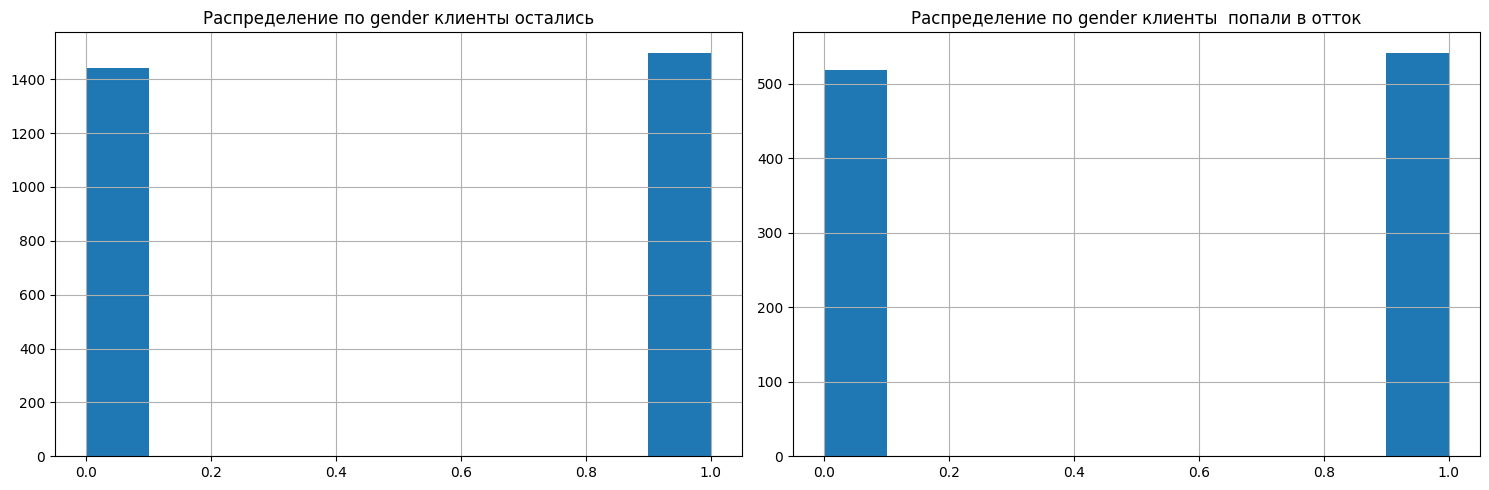

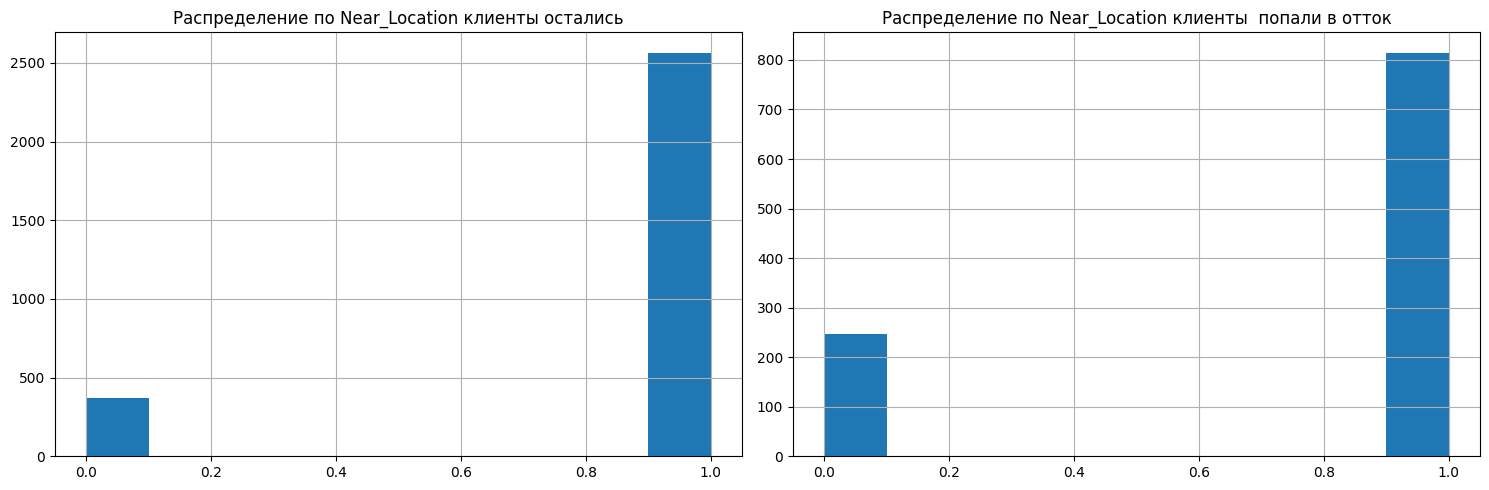

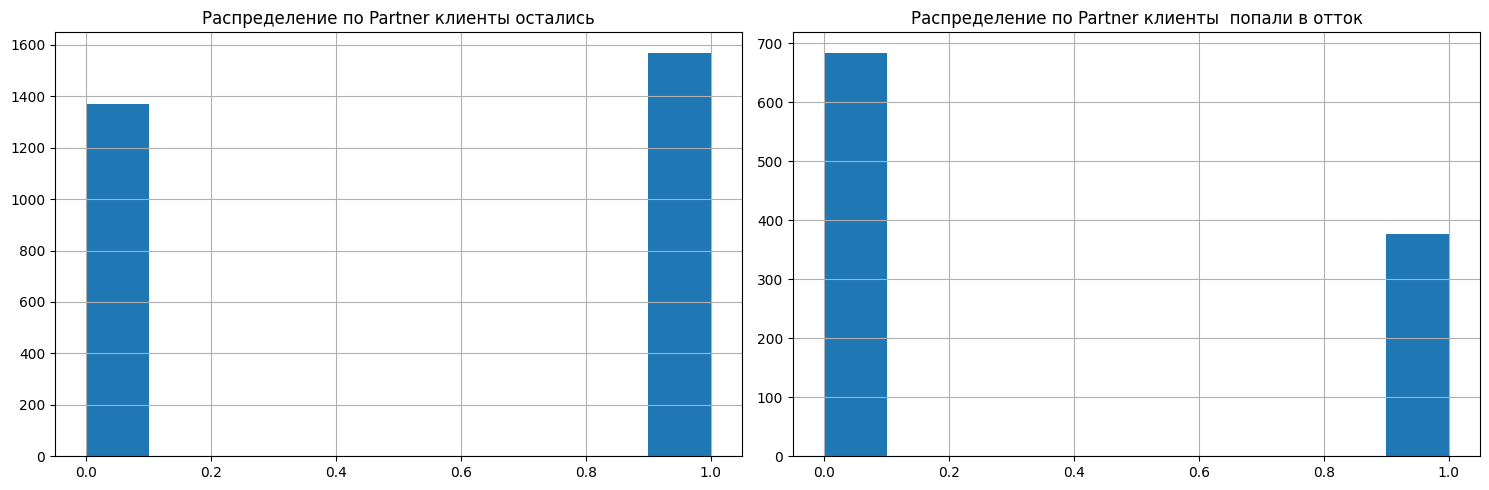

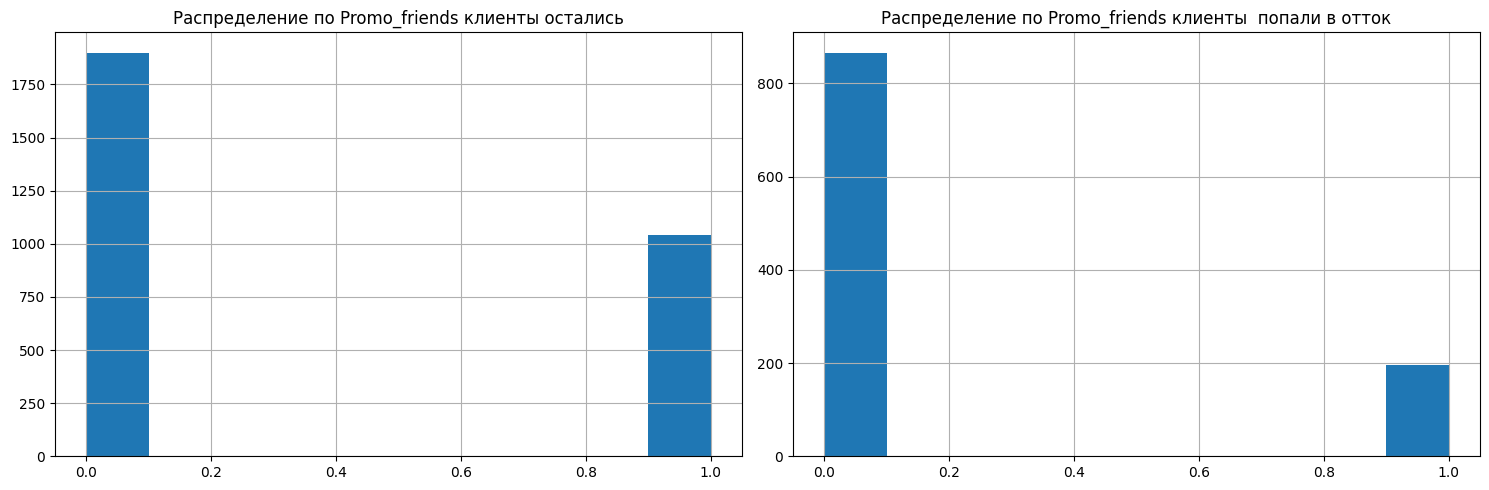

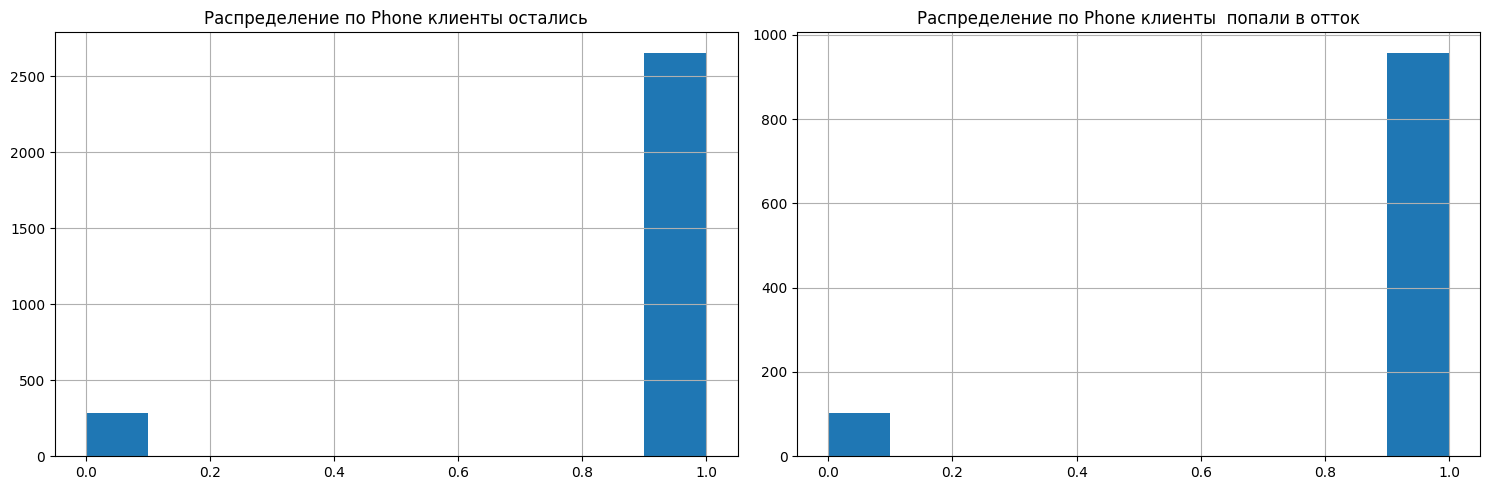

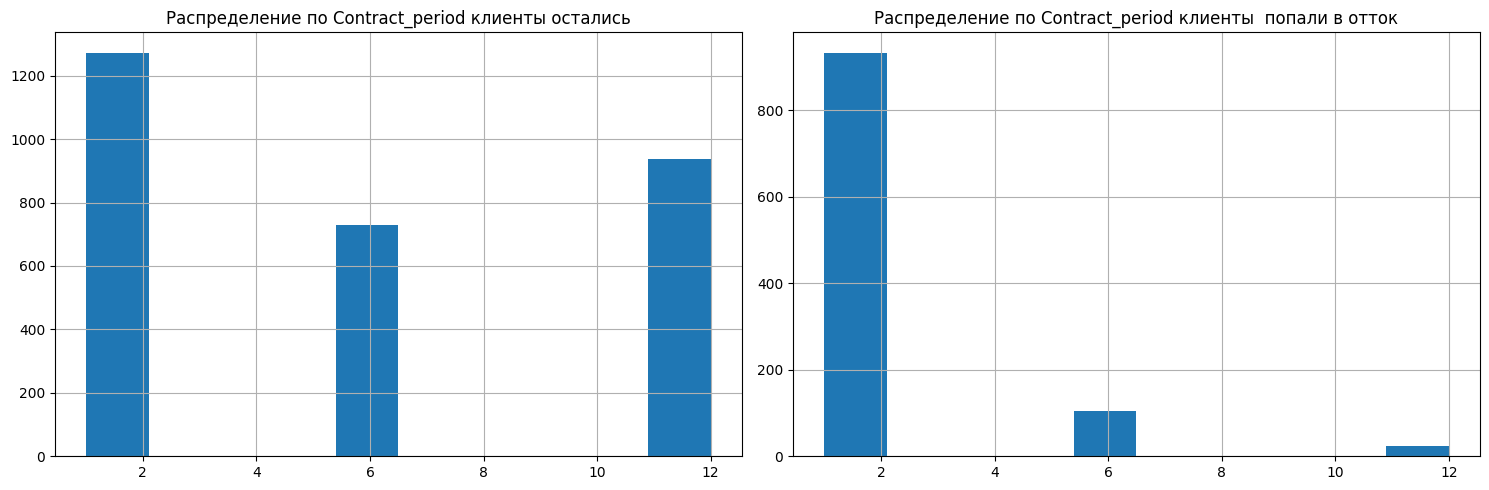

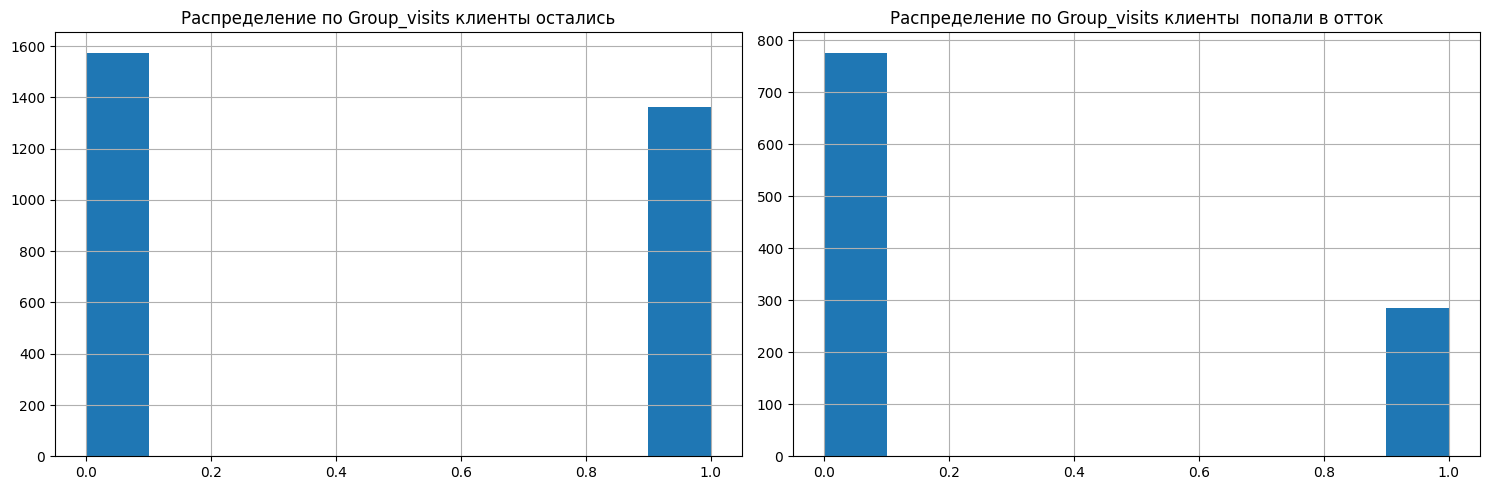

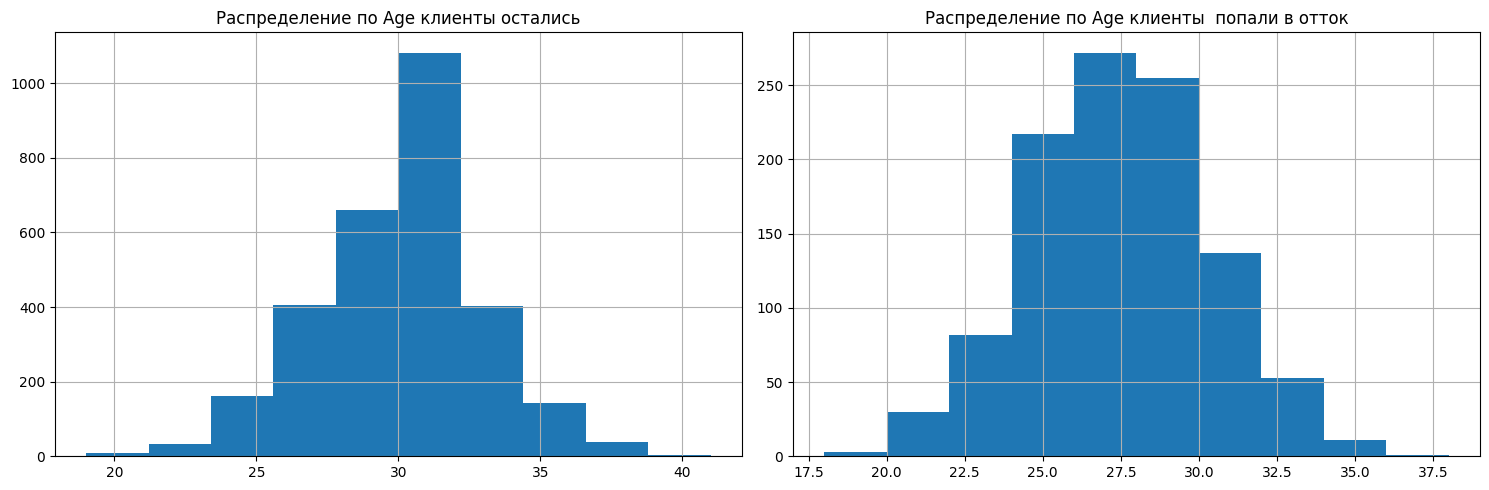

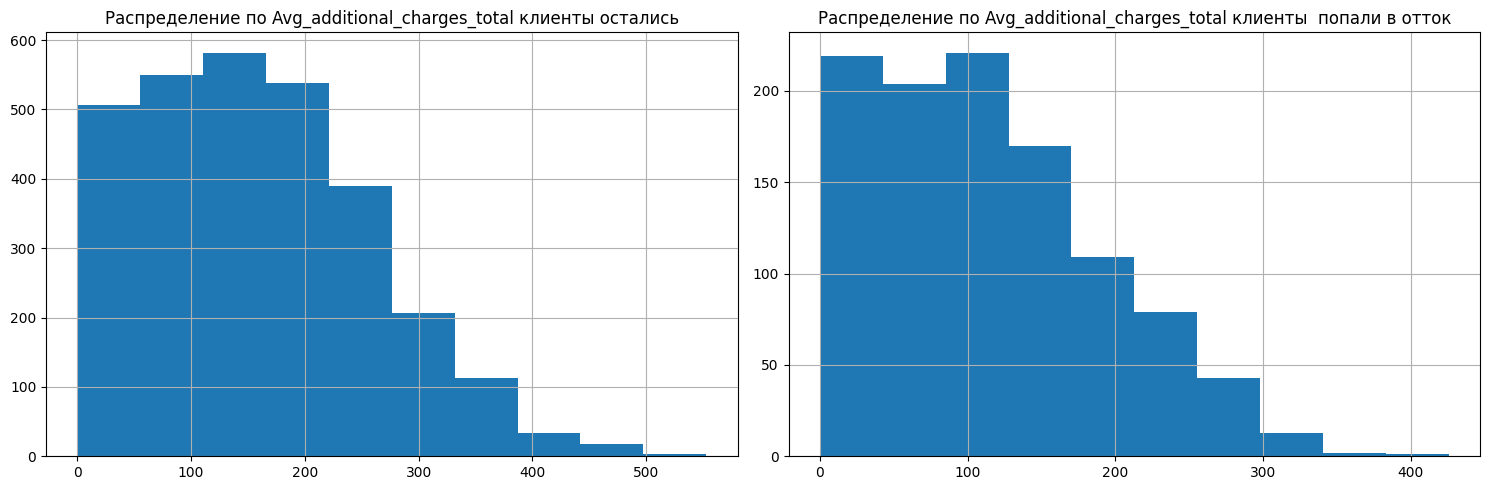

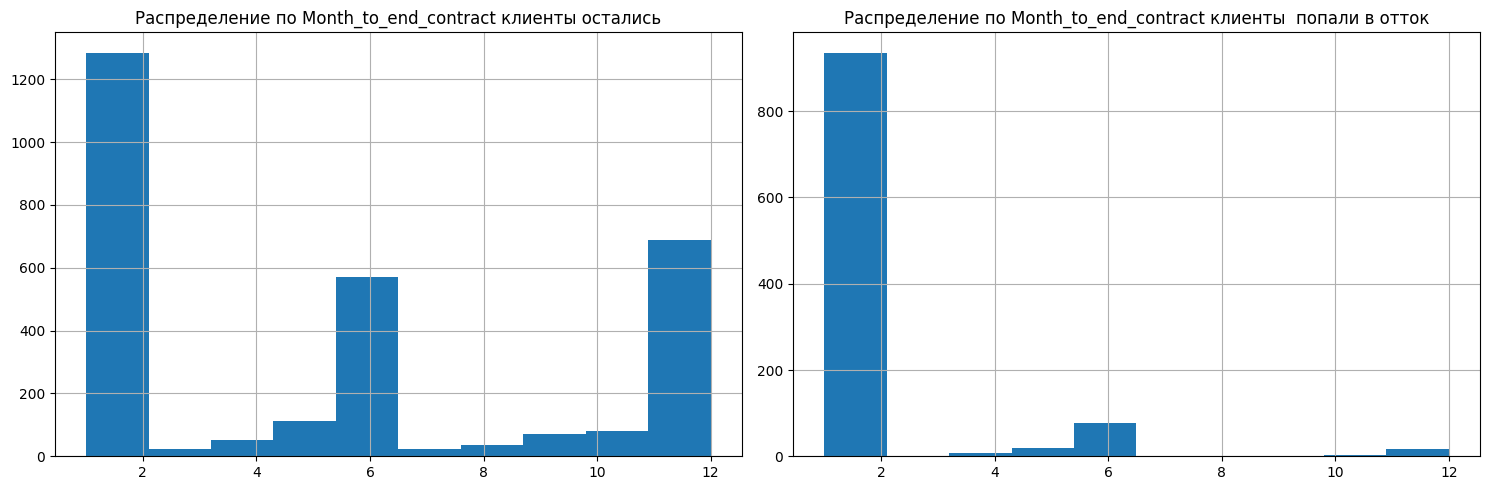

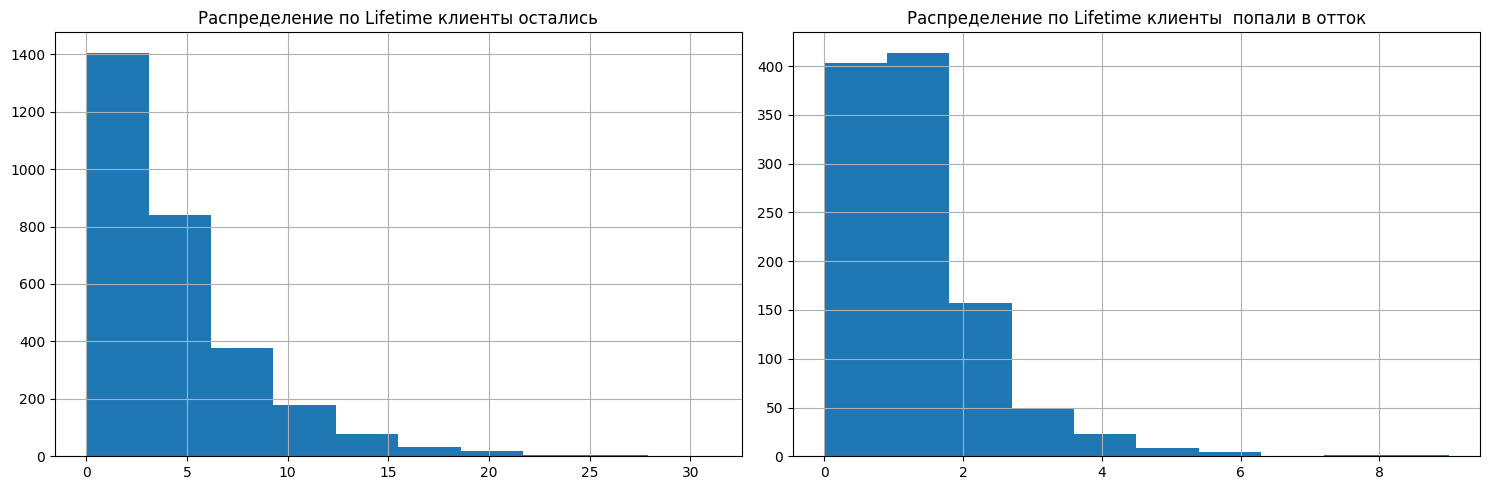

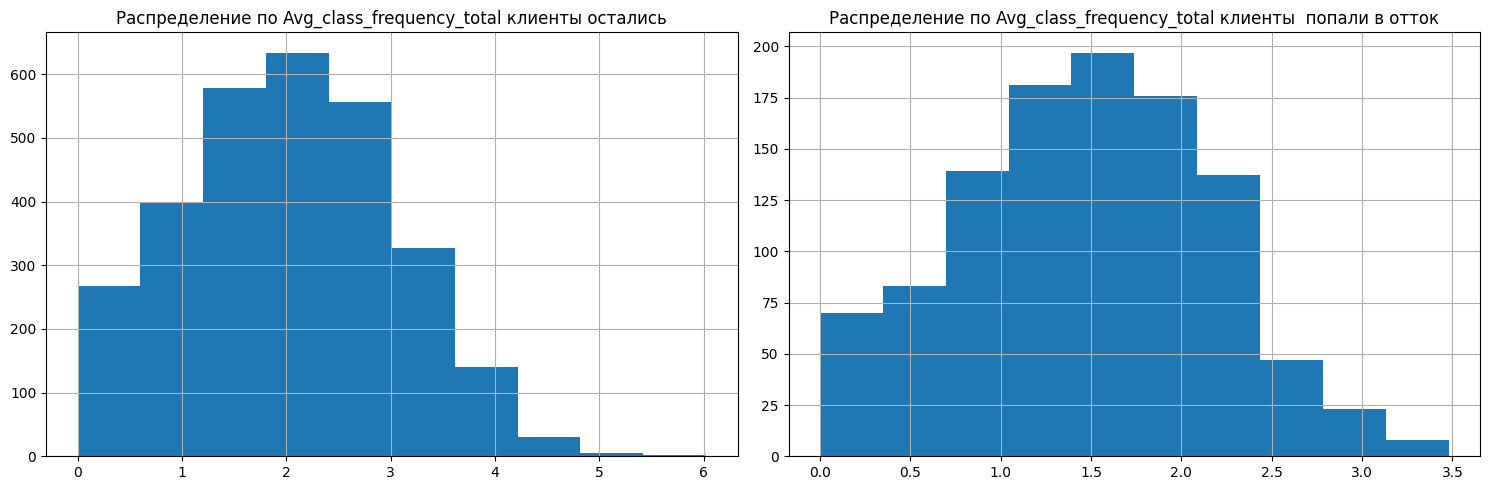

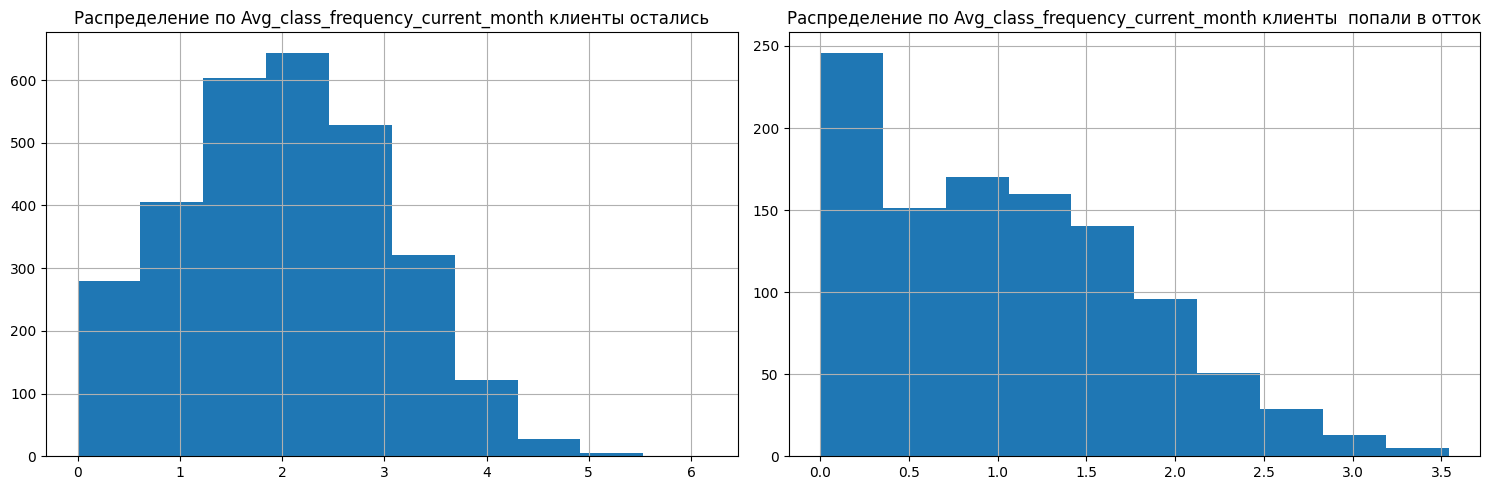

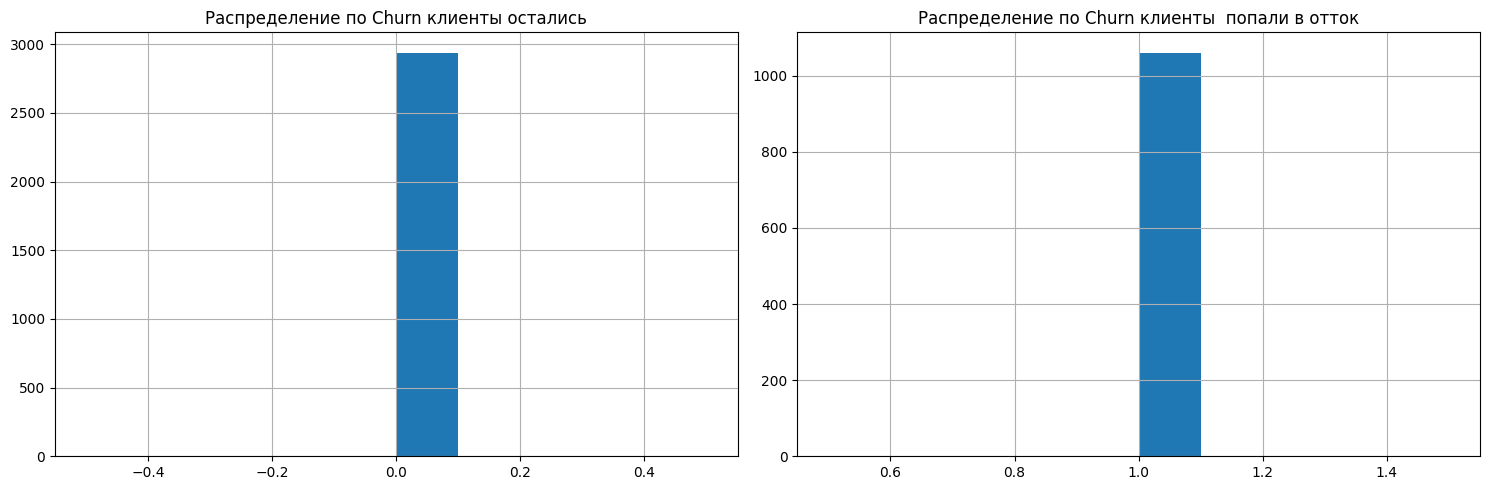

In [59]:
for col in list(df.columns):
  plt_plots(df_0, df_1, col, 'Распределение по '+col+' клиенты остались', 'Распределение по '+ col+' клиенты  попали в отток')

Мы можем наблюдать, что

1) половая принадлежность по-видимому никак не влияет на факт оттока,

2) Большинство клиентов часто живут рядом, но те, кто ушли чаще живут далеко
Уходили из клуба чаще не сотрудники компании-партнёра клуба

3) Те, кто пришел по акции  «приведи друга»  чаще оставались, чем те, кто не пользовался этой акцией

4) Наличие телефона, похоже, не влияет на факт оттока

5) Длительность текущего абонемента у тех, кто уходил чаще была короткой (2 месяца и меньше), а у тех кто оставался большая доля клиентов имела абонемент длительностью пол года и год

6) Клиенты, попавшие в отток реже посещали групповые занятия, чем те, которые остались в клубе

7) Самые частотный возраст тех, кто остался — 30 — 33 года, самый частотный возраст тех, кто покидал клуб — 26 — 30 лет

8) Те, кто остался в клубе обычно тратили больше (самые частотные суммы коолеблются от 0 до 230 примерно), в то время как те клиенты, которые попали в отток , обычно тратили от 0 до 130

9)Распределение 'Month_to_end_contract' похоже на 'Contract_period' (выводы те же — у клиентов, которые остались обычно период до окончания абонемента дольше)

10)У всех клиентов самый частотный'Lifetime' колеблется от 0 до 2,5 месяцев. Однако, у клиентов, попавших в отток lifetime редко превышает 6 месяцев, в то время как  у клиентов, оставшихся в клубе lifetime может быть намного большим (больше 10 месяцев)

11) Средняя частота посещений в неделю  у клиентов, оставшихся в клубе выше/  Самые частотные значения 2 против 0 у тех, кто попал в отток

<Axes: >

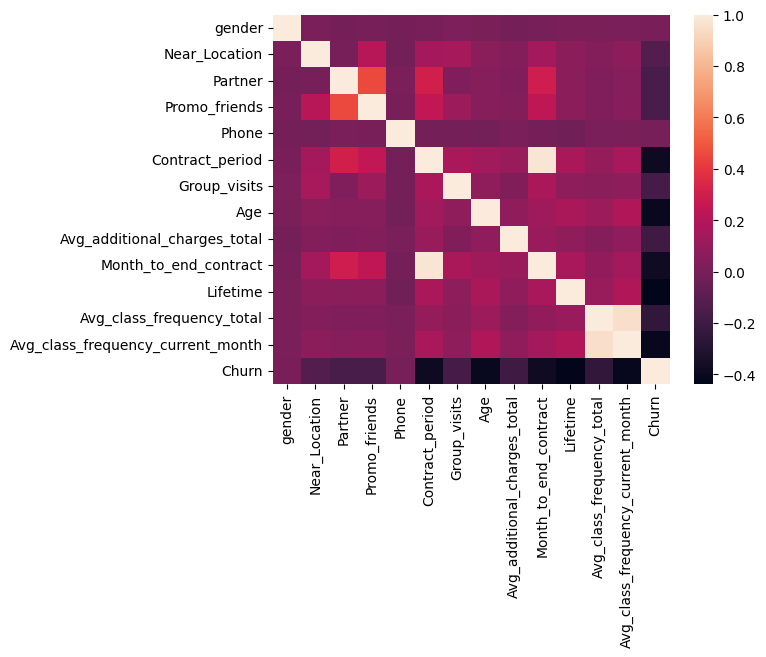

In [ ]:
cm = df.corr()
sns.heatmap(cm)

In [61]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))



In [62]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
lr_model = LogisticRegression(random_state=0)

In [66]:
models = [LogisticRegression(random_state=0),RandomForestClassifier()]


In [71]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print_all_metrics(y_test, y_pred, y_proba)

In [72]:
for i in models:
    print(i)
    make_prediction(m=i, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

LogisticRegression(random_state=0)
Метрики классификации
	Accuracy: 0.91
	Precision: 0.81
	Recall: 0.80
RandomForestClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Метрики классификации
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.81


In [73]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)



In [74]:
for i in models:
    print(i)
    make_prediction(m=i, X_train = X_train_st, y_train = y_train, X_test = X_test_st, y_test = y_test)

LogisticRegression(random_state=0)
Метрики классификации
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
RandomForestClassifier()
Метрики классификации
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.80


In [80]:
x_sc = scaler.fit_transform(X)
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(x_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
linked = linkage(x_sc, method = 'ward')